# Customer Segmentation #

Importing required libraries

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np

#viz Libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#datetime
import datetime as dt

#StandardSccaler
from sklearn.preprocessing import StandardScaler

#KMeans
from sklearn.cluster import KMeans

#file directoryy
import os

In [2]:
for dirname, _, filenames in os.walk('D:\Projects\Customer Segmentation\sales_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Reading the Data

In [3]:
#reading the data
df = pd.read_csv('D:\Projects\Customer Segmentation\sales_data.csv', encoding = 'unicode_escape')

In [4]:
#Dimensions of the data
df.shape

(2823, 25)

In [5]:
#Glimpse of the data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Dropping columns

In [6]:
#Removing the variables which dont add significant value fot the analysis.
to_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE']
df = df.drop(to_drop, axis=1)

Checking for null values

In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Checking for inconsistent data types

In [8]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [9]:
#Changing the data type of variable 'ORDERDATE' from object to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

Summary stats of Quantitative variables

In [10]:
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df[quant_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


## Exploring the variables ##

Order Quantity Distribution

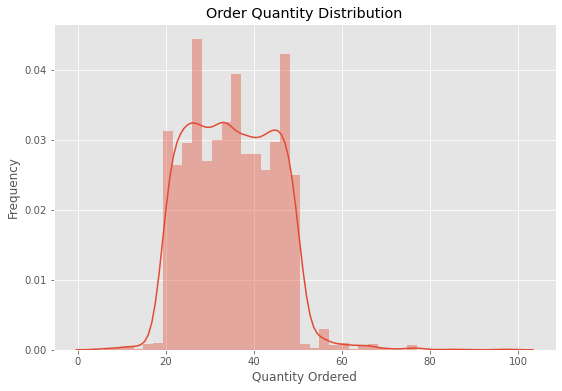

In [11]:
plt.figure(figsize=(9,6))
sns.distplot(df['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

Price Distribution

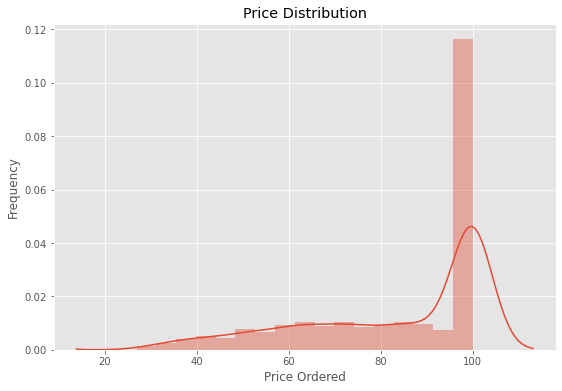

In [12]:
plt.figure(figsize=(9,6))
sns.distplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

Sales Distribution

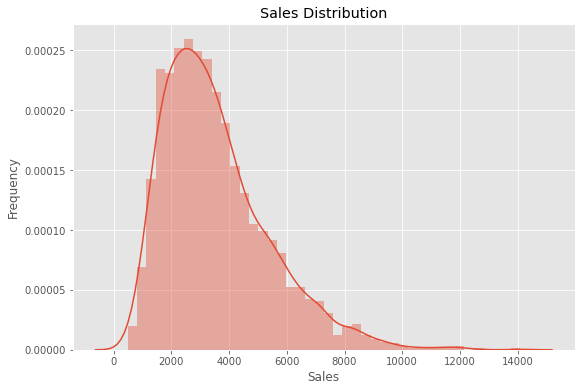

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(df['SALES'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Analyzing the STATUS variable

In [14]:
df['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

Checking the time range of the data

In [15]:
df.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

Dealsize Distribution

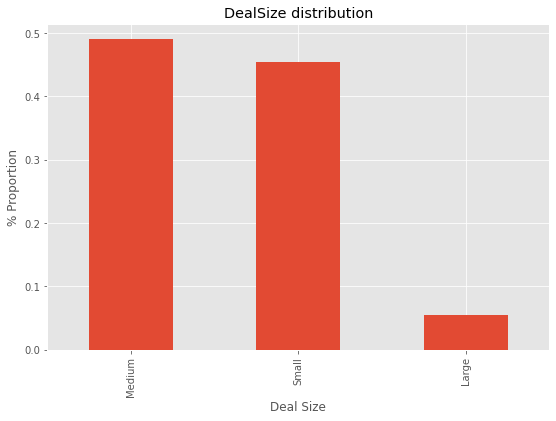

In [16]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

## Analyzing KPIs ##

### Annual Revenue ###

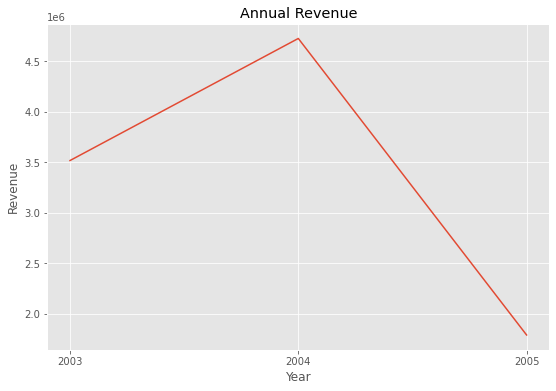

In [17]:
#Annual Revenue
plt.figure(figsize=(9,6))
df.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

### Monthly Revenue ###

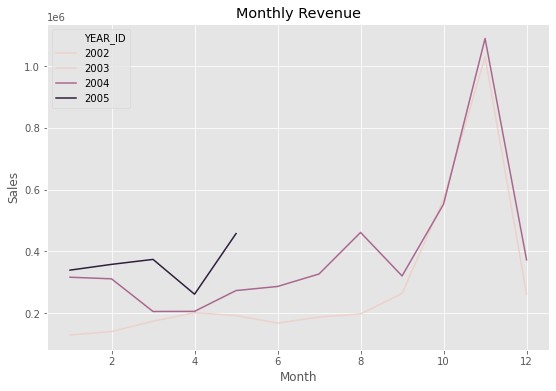

In [18]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

## Monthly Revenue Growth Rate ##

In [19]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()

In [20]:
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


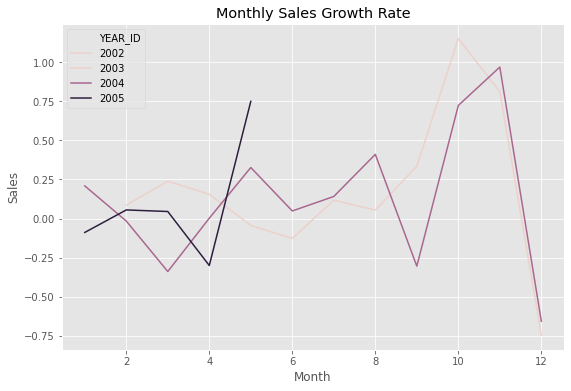

In [21]:
#Monthly Sales Growth Rate
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

## Top 10 Countries by Sales ##

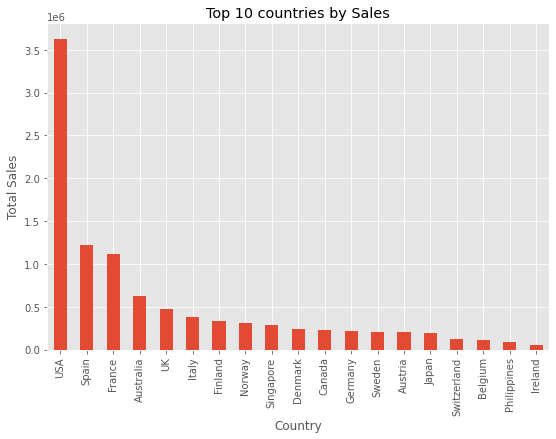

In [22]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

## Monthly Active Customers ##

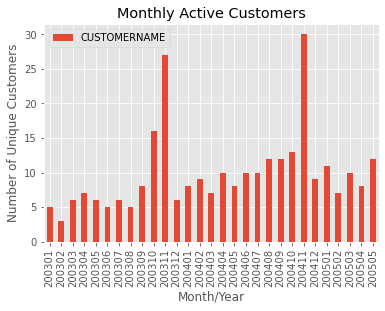

In [23]:
#plt.figure(figsize=(10,8))
df['YEAR_MONTH'] = df['YEAR_ID'].map(str)+df['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME')
#plt.figure(figsize=(10,8))
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
#plt.figure(figsize=(10,8))
plt.show()

## Average Sales per Order ##

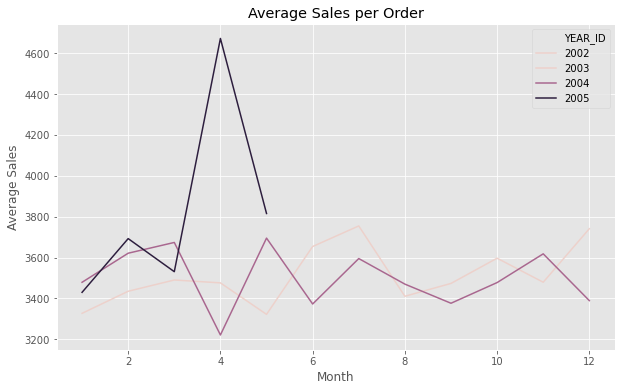

In [24]:
#Average Sales per Order
average_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

## New Customers Growth Rate ##

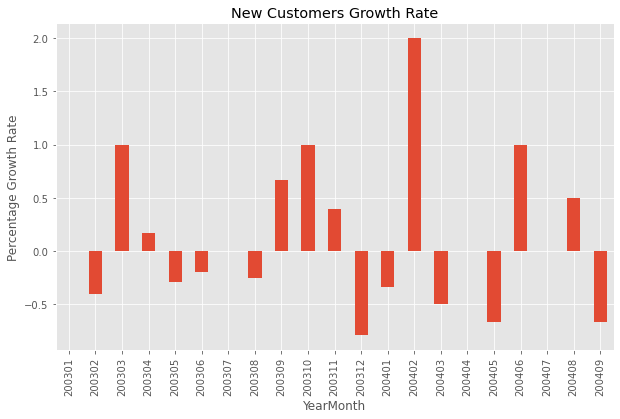

In [25]:
#New Customers Growth Rate
df_first_purchase = df.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
df_first_purchase.columns = ['CUSTOMERNAME','FirstPurchaseDate']

plt.figure(figsize=(10,6))
df_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Growth Rate')
plt.show()

## Segmentation with number of clusters chosen randomly ##

In [26]:
df['ORDERDATE'] = [d.date() for d in df['ORDERDATE']]
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR_MONTH
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,USA,NaN,Yu,Kwai,Small,200302
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,France,EMEA,Henriot,Paul,Small,200305
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Da Cunha,Daniel,Medium,200307
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,NaN,Young,Julie,Medium,200308
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NaN,Brown,Julie,Medium,200310


### Calculate Recency, Frequency and Monetary value for each customer ###

In [27]:
# Calculate Recency, Frequency and Monetary value for each customer
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days=1) #latest date in the data set
df_RFM = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

#Renaming the columns
df_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)

In [28]:
df_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


### Dividing the customer into 4 segments(Randomly Chosen) ###

In [29]:
#Dividing into segments

# Create a spend quartile with 4 groups - a range between 1 and 5
MonetaryValue_quartile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1,5))
Recency_quartile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(df_RFM['Frequency'], q=4, labels=range(1,5))


# Assign the quartile values to the Spend_Quartile column in data
df_RFM['R'] = Recency_quartile
df_RFM['F'] = Frequency_quartile
df_RFM['M'] = MonetaryValue_quartile

#df_RFM[['MonetaryValue_Quartile','Recency_quartile','Frequency_quartile']] = [MonetaryValue_quartile,Recency_quartile,Frequency_quartile]

# Print data with sorted Spend values
#print(df_RFM.sort_values('MonetaryValue'))

df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4
Alpha Cognac,65,20,70488.44,4,2,2
Amica Models & Co.,265,26,94117.26,1,2,3
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4
Atelier graphique,188,7,24179.96,2,1,1


## Calculating RFM Score ##

In [30]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10.0
Alpha Cognac,65,20,70488.44,4,2,2,8.0
Amica Models & Co.,265,26,94117.26,1,2,3,6.0
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11.0
Atelier graphique,188,7,24179.96,2,1,1,4.0


### Labelling the levels ###

In [31]:
#Naming Levels
# Define rfm_level function
def rfm_level(df):
    if np.bool(df['RFM_Score'] >= 10):
        return 'High Value Customer'
    elif np.bool((df['RFM_Score'] < 10) & (df['RFM_Score'] >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

# Create a new variable RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10.0,High Value Customer
Alpha Cognac,65,20,70488.44,4,2,2,8.0,Mid Value Customer
Amica Models & Co.,265,26,94117.26,1,2,3,6.0,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11.0,High Value Customer
Atelier graphique,188,7,24179.96,2,1,1,4.0,Low Value Customer


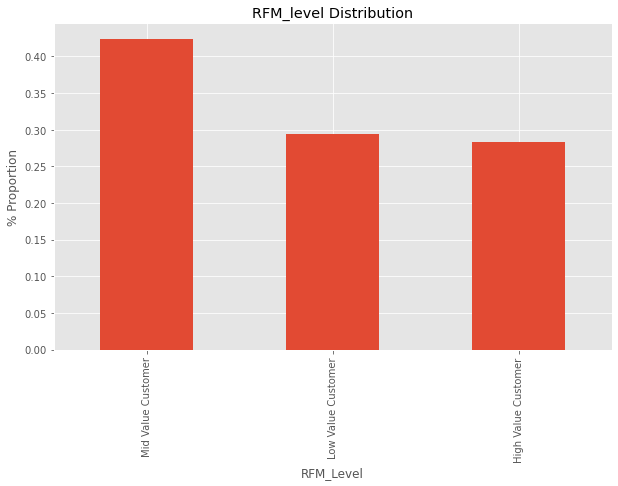

In [32]:
plt.figure(figsize=(10,6))
df_RFM['RFM_Level'].value_counts(normalize = True).plot(kind='bar')
plt.title('RFM_level Distribution')
plt.xlabel('RFM_Level')
plt.ylabel('% Proportion')
plt.show()

### Higher the monetary value, higher the MonetaryValue level ###

In [33]:
#Analyzing customer segments
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = df_RFM.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean','count']}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                    Recency Frequency MonetaryValue      
                       mean      mean          mean count
RFM_Level                                                
High Value Customer    85.0      54.3      193532.1    26
Low Value Customer    293.8      15.0       52414.6    27
Mid Value Customer    171.2      25.8       91938.5    39


## Segmentation using KMeans Clustering ##

### Data Preprocessing for KMeans ###

#### Check the distribution of the variables ####

In [34]:
data = df_RFM[['Recency','Frequency','MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


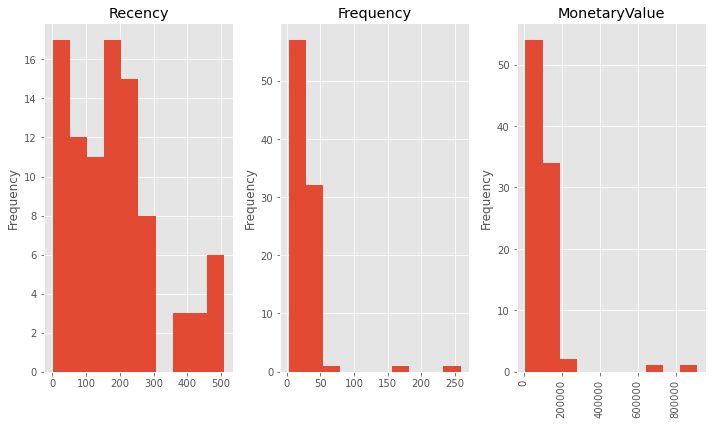

In [35]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
data['Recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
data['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
data['MonetaryValue'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()

#### Removing the skewness by performing log transformation on the variables ####

In [36]:
data_log = np.log(data)

In [37]:
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


#### Distribution of Recency, Frequency and MonetaryValue after Log Transformation ####

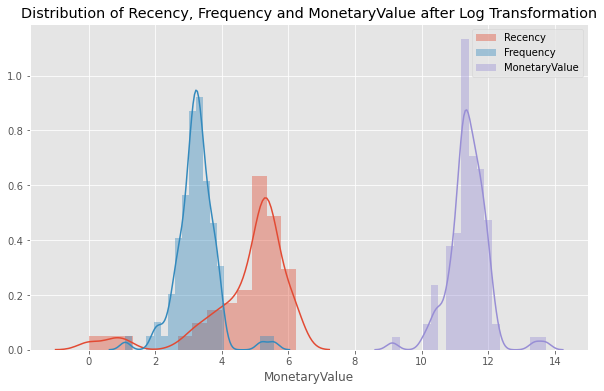

In [38]:
plt.figure(figsize=(10,6))

#plt.subplot(1,3,1)
sns.distplot(data_log['Recency'],label='Recency')

#plt.subplot(1,3,1)
sns.distplot(data_log['Frequency'],label='Frequency')

#plt.subplot(1,3,1)
sns.distplot(data_log['MonetaryValue'],label='MonetaryValue')

plt.title('Distribution of Recency, Frequency and MonetaryValue after Log Transformation')
plt.legend()
plt.show()

#### Standardizing the variables using StandardScaler() for equal variance and mean ####

In [39]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


### Choosing number of Clusters using Elbow Method ###

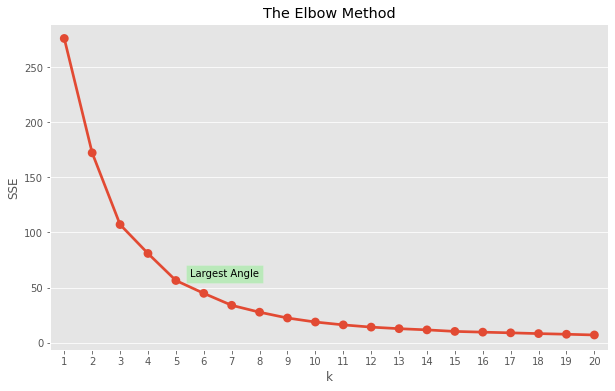

In [40]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

    
plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

### Running KMeans with 5 clusters ###

In [41]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_rfm = data.assign(Cluster=cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,0
Alpha Cognac,65,20,70488.44,4
Amica Models & Co.,265,26,94117.26,4
"Anna's Decorations, Ltd",84,46,153996.13,0
Atelier graphique,188,7,24179.96,1


In [42]:
# Group the data by cluster
grouped = data_rfm.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         133.4      36.4      130895.7    32
1         324.2      10.7       35628.7    12
2           4.6      39.0      135721.0     5
3           2.0     219.5      783576.1     2
4         210.6      21.8       77333.3    41

## Building Customer Personas ##

### Snake Plot ###

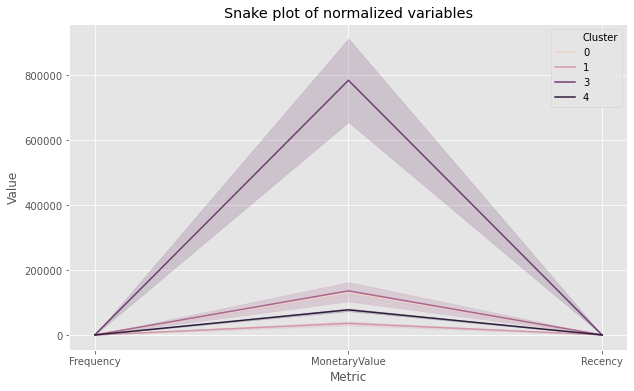

In [43]:
data_rfm_melt = pd.melt(data_rfm.reset_index(), id_vars=['CUSTOMERNAME', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=data_rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

### Calculating relative importance of each attribute ###

In [44]:
# Calculate average RFM values for each cluster
cluster_avg = data_rfm.groupby(['Cluster']).mean() 
print(cluster_avg)

            Recency   Frequency  MonetaryValue
Cluster                                       
0        133.406250   36.437500  130895.744687
1        324.250000   10.666667   35628.653333
2          4.600000   39.000000  135721.034000
3          2.000000  219.500000  783576.085000
4        210.560976   21.829268   77333.264390


In [45]:
# Calculate average RFM values for the total customer population
population_avg = data.mean()
print(population_avg)

Recency             182.826087
Frequency            30.684783
MonetaryValue    109050.313587
dtype: float64


In [46]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.27       0.19           0.20
1           0.77      -0.65          -0.67
2          -0.97       0.27           0.24
3          -0.99       6.15           6.19
4           0.15      -0.29          -0.29


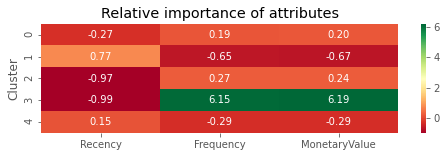

In [47]:
#Plot Relative Importance

# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()